Q1:
The standard deviation of the original data is a statistic calculated from simply observing the distribution of the sampled data, describing how clustered/spread apart the data are. One standard deviation away from the mean in either direction encapsulates 66% of the data points, and 2 stds encapsulate 95%.
The standard error of the mean, however, is the standard deviation of the dataset of means gathered by bootstrapping the original dataset. Meaning, it tells you how variable the mean of a typical sample is, based off of the original sample.

Q2: To create a 95% confidence interval, simply construct the interval (m-2d,m+2d), where m is the mean of the set of means gathered by bootstrapping, and d is the standard error of the mean.

Q3: To create a 95% confidence interval without applying std on the bootstrapped means, we can instead find the 2.5% and 97.5% quantile, since by definition, 95% of the data points lie between those values. So our interval would look like (quant(0.025),quant(0.975))

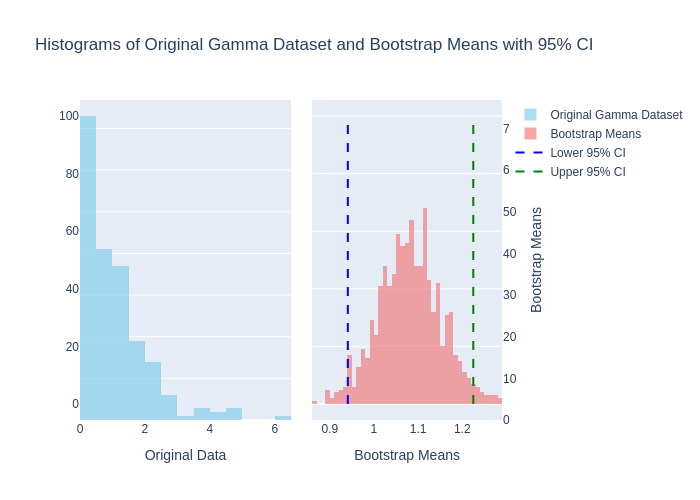

In [27]:
#Q4:
import numpy as np
import plotly.graph_objects as go

# Parameters for the gamma distribution
shape = 1
scale = 1
size = 200

# Generate 200 points from a gamma distribution
gamma_data = np.random.gamma(shape, scale, size)

# Number of bootstrap iterations
n_bootstraps = 1000

# Array to store the mean of each bootstrap sample
bootstrap_means = np.zeros(n_bootstraps)

# Perform bootstrapping
for i in range(n_bootstraps):
    # Sample with replacement from the original dataset
    bootstrap_sample = np.random.choice(gamma_data, size=size, replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Create figure
fig = go.Figure()

# Add histogram for original gamma dataset
fig.add_trace(go.Histogram(
    x=gamma_data,
    name='Original Gamma Dataset',
    opacity=0.7,
    marker=dict(color='skyblue'),
    xaxis='x1',
    yaxis='y1'
))

# Add histogram for bootstrap means
fig.add_trace(go.Histogram(
    x=bootstrap_means,
    name='Bootstrap Means',
    opacity=0.7,
    marker=dict(color='lightcoral'),
    xaxis='x2',
    yaxis='y2'
))

# Add lines for confidence intervals on the bootstrap means histogram
fig.add_trace(go.Scatter(
    x=[lower_bound, lower_bound],
    y=[0, 100],  # Adjust the y range as needed
    mode='lines',
    name='Lower 95% CI',
    line=dict(color='blue', width=2, dash='dash'),
    xaxis='x2',
    yaxis='y2'
))

fig.add_trace(go.Scatter(
    x=[upper_bound, upper_bound],
    y=[0, 100],  # Adjust the y range as needed
    mode='lines',
    name='Upper 95% CI',
    line=dict(color='green', width=2, dash='dash'),
    xaxis='x2',
    yaxis='y2'
))

# Update layout
fig.update_layout(
    title_text='Histograms of Original Gamma Dataset and Bootstrap Means with 95% CI',
    xaxis_title='Value',
    yaxis_title='Frequency',
    barmode='overlay',
    xaxis=dict(
        title='Original Data',
        domain=[0, 0.5]  # First subplot
    ),
    yaxis=dict(
        title='Bootstrap Means',
        anchor='x2',
        overlaying='y1',
        side='right',
        domain=[0, 1]  # Second subplot
    ),
    xaxis2=dict(
        title='Bootstrap Means',
        domain=[0.55, 1]  # Second subplot
    )
)

# Show figure
fig.show(renderer="png")



Q5: When talking about the population parameter, we are dealing with a constant yet unknown quantity, whereas a sample statistic is known, and dependent on the sample taken. In the context of confidence intervals, it's important to remember that the CI is constructed in part based on the sample statistic, so the interval describes our confidence in the given sample in characterizing the parameter, not our confidence in the location of the parameter, per se.

Q6:
    What is the process of bootstrapping? Bootstrapping takes a bunch of data that we have collected as a sample from a larger population, and then pretends that sample is a "population" in its own right. We then take many many samples from that "population" and collect data points from that (often the mean), to simulate what it would be like, had we had the true population on hand.
    What is the purpose of boostrapping? Using the bootstrapped data, we can make predictions and estimates about population parameters. This way, we can make reasonable claims about data (the population) that we have to practical way of accessing the totality of.
    Third question: Using bootstrapping, we would take a great many samples from the sample of size n (with replacement) and assemble the sample means into a dataset. Then, we could find a "confidence" interval, where in 95% of universes, the population mean lies within the interval.

Q7: The reason we couldn't throw out the possibility that the drug would have no net effect on the population was because, due to the 95% confidence interval including 0, in most universes (95% of them), the population mean would lie in an interval including 0.
We could reject the null hypothesis if a confidence interval excludes 0.

Q8:
For this project, the "Null Hypothesis" Would be that the drug will have no net effect on the overall population, based on the sample taken.
Below are some visualizations and statistics summarizing the sample.

Basic Statistics:
       PatientID       Age  InitialHealthScore  FinalHealthScore
count   10.00000  10.00000           10.000000         10.000000
mean     5.50000  38.40000           81.000000         84.300000
std      3.02765   8.30261            2.828427          2.110819
min      1.00000  26.00000           76.000000         80.000000
25%      3.25000  33.25000           79.250000         83.250000
50%      5.50000  38.00000           81.000000         85.000000
75%      7.75000  44.00000           83.000000         86.000000
max     10.00000  52.00000           85.000000         86.000000

Change in Health Score:
   PatientID  HealthScoreChange
0          1                  2
1          2                  8
2          3                 -3
3          4                  5
4          5                  3
5          6                  6
6          7                  7
7          8                 -3
8          9                  7
9         10                  1


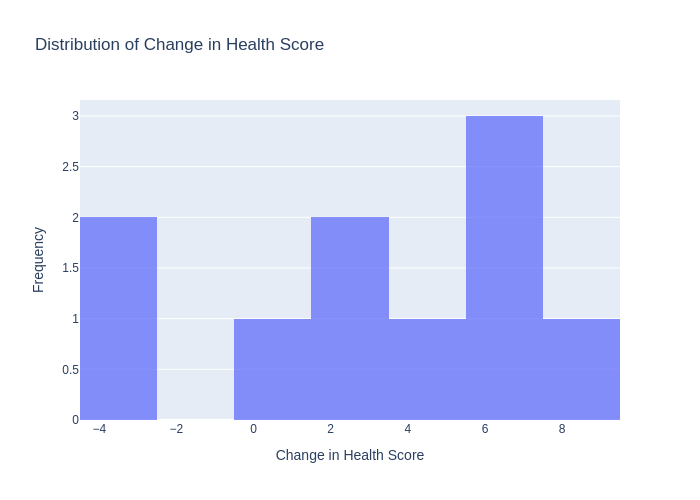

In [36]:
#Q8:
import pandas as pd
import plotly.express as px
import numpy as np
np.random.seed(213313)
# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/davidajobin/STA130/refs/heads/main/H4data.csv'
df = pd.read_csv(url)

# Display basic statistics
print("Basic Statistics:")
print(df.describe())

# Calculate the change in health score
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Display the change in health score
print("\nChange in Health Score:")
print(df[['PatientID', 'HealthScoreChange']])

# Visualize the distribution of the change in health score
fig = px.histogram(df, x='HealthScoreChange', nbins=10, title='Distribution of Change in Health Score',
                   labels={'HealthScoreChange': 'Change in Health Score'})
fig.update_traces(opacity=0.75)  # Make bars semi-transparent
fig.update_layout(xaxis_title='Change in Health Score', yaxis_title='Frequency')
fig.show(renderer="png")

Q8:
I will be bootstrapping this dataset (change in health score) in order to determine a 95% confidence interval, observeing whether or not the interval includes the value 0. If it does not, we can reasonably throw out the Null Hypothesis.


Bootstrap Means Summary:
Mean of Bootstrap Means: 3.3743
Standard Deviation of Bootstrap Means: 1.2335596904892767
95% Confidence Interval: [0.8975000000000002, 5.7]


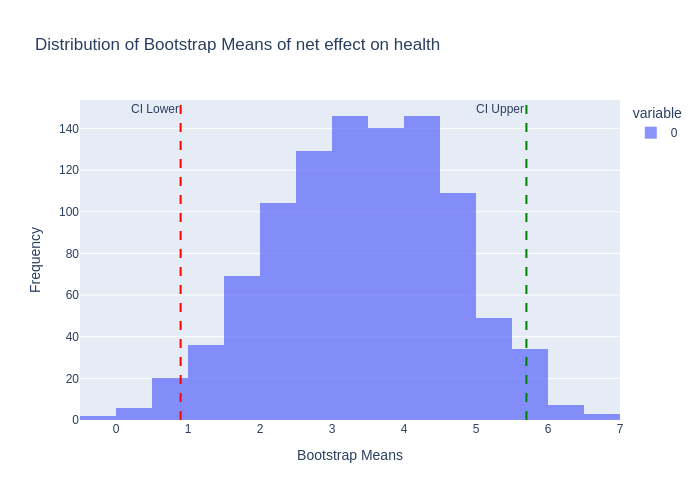

In [45]:
#Q8


# Set the number of bootstrap samples
n_bootstraps = 1000
boot_means = []
np.random.seed()
# Perform bootstrapping
for _ in range(n_bootstraps):
    # Generate a bootstrap sample
    sample = np.random.choice(df['HealthScoreChange'], size=len(df), replace=True)
    # Calculate the mean of the sample
    boot_means.append(np.mean(sample))

# Convert the list of means to a numpy array for further analysis
boot_means = np.array(boot_means)

# Calculate the 95% confidence interval
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

# Display the results
print("\nBootstrap Means Summary:")
print(f"Mean of Bootstrap Means: {np.mean(boot_means)}")
print(f"Standard Deviation of Bootstrap Means: {np.std(boot_means)}")
print(f"95% Confidence Interval: [{ci_lower}, {ci_upper}]")

# Visualize the distribution of bootstrap means with confidence intervals
fig_boot = px.histogram(boot_means, nbins=30, title='Distribution of Bootstrap Means of net effect on health',
                         labels={'value': 'Mean of Net effect on health (Bootstrapped)'})

# Add lines for the confidence intervals
fig_boot.add_vline(x=ci_lower, line_color='red', line_dash='dash', annotation_text='CI Lower', 
                   annotation_position='top left')
fig_boot.add_vline(x=ci_upper, line_color='green', line_dash='dash', annotation_text='CI Upper', 
                   annotation_position='top left')

fig_boot.update_traces(opacity=0.75)  # Make bars semi-transparent
fig_boot.update_layout(xaxis_title='Bootstrap Means', yaxis_title='Frequency')
fig_boot.show(renderer="png")

Q8:
Since the confidence interval generated lies outside of the 95% confidence interval, it is reasonable to throw out the Null  Hypothesis of "No Effect".
This is again, considering the population as a whole. Outside the scope of this project would be analyzing the data on different factors, such as age and gender.

Q9: No

Summary of ChatBot session used for questions 1-7:
https://chatgpt.com/share/66ff639f-6acc-8010-816e-99c1ab82bd4b

1. **Dataset Generation**:
   - You requested a dataset of 200 points sampled from a gamma distribution with shape and scale parameters both set to 1. I provided Python code to generate this dataset using NumPy.

2. **Data Visualization**:
   - You asked for a histogram to visualize the dataset, which I created using Matplotlib. You later requested to modify the code to use Plotly for the visualization instead, and I provided updated code that produced an interactive histogram.

3. **Bootstrapping**:
   - You wanted to bootstrap the dataset 1000 times and calculate the mean for each bootstrap sample. I provided Python code for this, which also displayed the first five means.
   - Later, you requested to visualize the distribution of the bootstrap means as a histogram. I updated the code to include the histogram for bootstrap means.

4. **Confidence Intervals**:
   - You asked about calculating and displaying the 95% confidence interval for the bootstrap means. I added this feature to the histogram, indicating the confidence intervals with dashed lines.

5. **Plotly Visualization**:
   - You requested further modifications to display the confidence intervals on the bootstrap means histogram rather than the original dataset histogram. I provided the final version of the Plotly code that achieved this.

6. **Discussion on Population Parameters and Sample Statistics**:
   - We discussed the importance of distinguishing between population parameters (fixed values describing a population) and sample statistics (random values computed from a sample). I explained how confidence intervals relate to these concepts, clarifying that the CI reflects uncertainty in estimating the population parameter based on sample statistics.

### Conclusion:
The conversation covered data generation, bootstrapping, visualization with both Matplotlib and Plotly, and statistical concepts related to confidence intervals.

Summary of ChatBot session used for question 8:
https://chatgpt.com/share/66ff63d7-aa14-8010-a3db-8ae999b03c54

1. **Data Loading and Initial Analysis**:
   - You provided a dataset with columns for Patient ID, Age, Gender, Initial Health Score, and Final Health Score.
   - I provided Python code to load the data from a specified URL, calculate basic statistics, check for missing values, and visualize the relationship between initial and final health scores using Matplotlib.

2. **Modifications to the Code**:
   - You requested modifications to remove the dot plot and missing values chart from the analysis.
   - I updated the code accordingly, retaining the calculation of the change in health score and the visualization of its distribution.

3. **Switching to Plotly**:
   - You asked to replace Matplotlib with Plotly for visualizations.
   - I provided code that used Plotly to create an interactive histogram of the change in health score.

4. **Bootstrapping**:
   - You requested additional code to perform bootstrapping on the "change in health score" data, generating 1000 bootstrap samples and calculating their means.
   - I provided the bootstrapping code, including the calculation of the mean, standard deviation, and confidence interval for the bootstrap means.

5. **Visualizing Confidence Intervals**:
   - You asked to display the confidence interval on top of the bootstrap graph.
   - I modified the previous code to include vertical lines for the confidence interval bounds on the histogram of bootstrap means.

This summary captures the key points and modifications made during our discussion.